# Imports

In [3]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from torch import nn
from torchvision import transforms
import torchvision

# Activation Functions

## ReLU

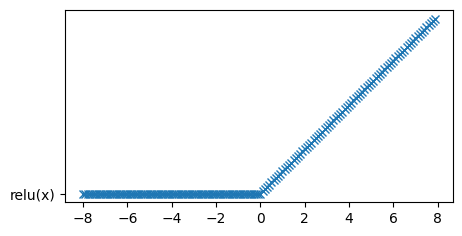

In [8]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
plt.figure(figsize=(5, 2.5))
plt.plot(x.detach().numpy(), y.detach().numpy(), 'x', 'relu(x)')

Plotting the derivative of ReLU based on the value of x

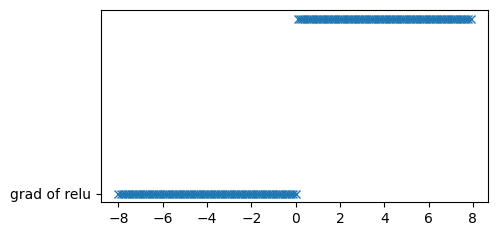

In [9]:
y.backward(torch.ones_like(x), retain_graph=True)
plt.figure(figsize=(5, 2.5))
plt.plot(x.detach(), x.grad, 'x', 'grad of relu')

## Sigmoid Function

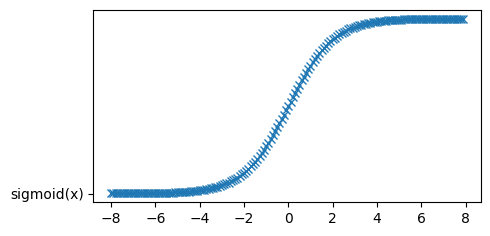

In [10]:
y = torch.sigmoid(x)
plt.figure(figsize=(5, 2.5))
plt.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)')

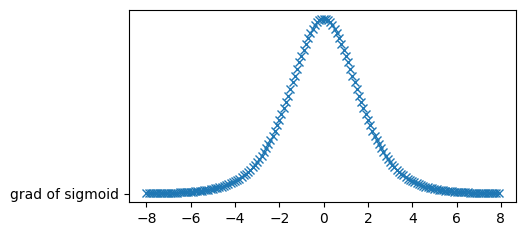

In [11]:
# Clear out previous gradients
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
plt.figure(figsize=(5, 2.5))
plt.plot(x.detach(), x.grad, 'x', 'grad of sigmoid')

## Tanh Function

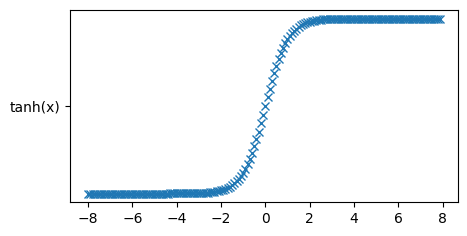

In [12]:
y = torch.tanh(x)
plt.figure(figsize=(5, 2.5))
plt.plot(x.detach(), y.detach(), 'x', 'tanh(x)')

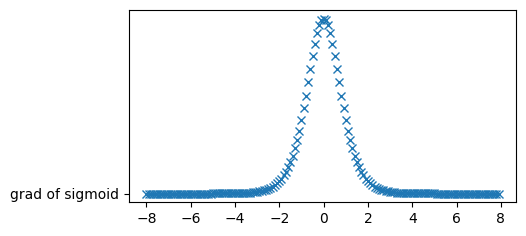

In [13]:
# Clear out previous gradients
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
plt.figure(figsize=(5, 2.5))
plt.plot(x.detach(), x.grad, 'x', 'grad of sigmoid')

# Implementation

In [8]:
class FashionMNIST:
    """The Fashion-MNIST dataset."""
    def __init__(self, batch_size=64, resize=(28, 28)):
        trans = transforms.Compose([transforms.Resize(resize),
                                    transforms.ToTensor()])
        self.root = "/"
        self.batch_size = batch_size
        self.train = torchvision.datasets.FashionMNIST(
            root=self.root, train=True, transform=trans, download=True)
        self.val = torchvision.datasets.FashionMNIST(
            root=self.root, train=False, transform=trans, download=True)

    def text_labels(self, indices):
        """Return text labels."""
        labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
        return [labels[int(i)] for i in indices]

    def get_dataloader(self, train):
        data = self.train if train else self.val
        return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train)
    
    def visualize(self, batch, nrows=1, ncols=8, labels=[]):
        X, y = batch
        if not labels:
            labels = self.text_labels(y)
        plt.figure(figsize=(2 * ncols, 2 * nrows))
        max_imgs = min(X.shape[0], nrows * ncols)
        for i in range(max_imgs):
            plt.subplot(nrows, ncols, i + 1)
            img = X[i].squeeze().numpy()
            plt.imshow(img, cmap='gray')
            plt.title(labels[i])
            plt.axis('off')
        plt.tight_layout()
        plt.show()

In [1]:
def relu(x):
    return torch.where(x > 0, x, torch.zeros_like(x))

In [ ]:
class MLP:
    def __init__(self, num_outputs, num_hiddens, lr):
        self.num_outputs = num_outputs
        self.num_hiddens = num_hiddens
        self.lr = lr
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.LazyLinear(num_hiddens),
            nn.ReLU(),
            nn.LazyLinear(num_outputs)
        )

    def train(self, X, y):
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.SGD(self.net.parameters(), lr=self.lr)
        for epoch in range(10):
            optimizer.zero_grad()
            output = self.net(X)
            loss = criterion(output, y)
            loss.backward()
            optimizer.step()
            print(f'Epoch {epoch + 1}, Loss: {loss.item()}')


In [6]:
model = MLP(num_outputs=10, num_hiddens=256, lr=0.01)

In [13]:
data = FashionMNIST(resize=(32, 32))  
len(data.train), len(data.val)

(60000, 10000)

In [14]:
training_data = data.get_dataloader(train=True)

In [15]:
for X_train, y_train in training_data:
    model.train(X_train, y_train)

Epoch 1, Loss: 2.2950327396392822
Epoch 2, Loss: 2.28277587890625
Epoch 3, Loss: 2.270948886871338
Epoch 4, Loss: 2.2594664096832275
Epoch 5, Loss: 2.2482047080993652
Epoch 6, Loss: 2.2372589111328125
Epoch 7, Loss: 2.2266170978546143
Epoch 8, Loss: 2.216336965560913
Epoch 9, Loss: 2.2062418460845947
Epoch 10, Loss: 2.1963441371917725
Epoch 1, Loss: 2.206146717071533
Epoch 2, Loss: 2.1966469287872314
Epoch 3, Loss: 2.18758225440979
Epoch 4, Loss: 2.1787919998168945
Epoch 5, Loss: 2.170348882675171
Epoch 6, Loss: 2.16221284866333
Epoch 7, Loss: 2.154283285140991
Epoch 8, Loss: 2.146466016769409
Epoch 9, Loss: 2.138770341873169
Epoch 10, Loss: 2.1312458515167236
Epoch 1, Loss: 2.1216399669647217
Epoch 2, Loss: 2.1035995483398438
Epoch 3, Loss: 2.0863137245178223
Epoch 4, Loss: 2.069864273071289
Epoch 5, Loss: 2.0541293621063232
Epoch 6, Loss: 2.0388996601104736
Epoch 7, Loss: 2.0241715908050537
Epoch 8, Loss: 2.0100016593933105
Epoch 9, Loss: 1.9962847232818604
Epoch 10, Loss: 1.98294651

# MLP With Dropout

## Dropout

In [1]:
def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    if dropout == 1: return torch.zeros_like(X)
    mask = (torch.rand(X.shape) > dropout).float()
    return mask * X / (1.0 - dropout)

In [4]:
X = torch.arange(16, dtype = torch.float32).reshape((2, 8))
print('dropout_p = 0:', dropout_layer(X, 0))
print('dropout_p = 0.5:', dropout_layer(X, 0.5))
print('dropout_p = 1:', dropout_layer(X, 1))

dropout_p = 0: tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
dropout_p = 0.5: tensor([[ 0.,  2.,  0.,  6.,  0.,  0.,  0., 14.],
        [ 0.,  0., 20.,  0., 24., 26., 28.,  0.]])
dropout_p = 1: tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


## Implementation

In [12]:
class DropoutMLPScratch:
    def __init__(self, num_outputs, num_hiddens_1, num_hiddens_2,
                 dropout_1, dropout_2, lr):
        self.num_outputs = num_outputs
        self.num_hiddens_1 = num_hiddens_1
        self.num_hiddens_2 = num_hiddens_2
        self.dropout_1 = dropout_1
        self.dropout_2 = dropout_2
        self.lr = lr
        self.lin1 = nn.LazyLinear(num_hiddens_1)
        self.lin2 = nn.LazyLinear(num_hiddens_2)
        self.lin3 = nn.LazyLinear(num_outputs)
        self.relu = nn.ReLU()

    def forward(self, X, training):
        H1 = self.relu(self.lin1(X.reshape((X.shape[0], -1))))
        if training:
            H1 = dropout_layer(H1, self.dropout_1)
        H2 = self.relu(self.lin2(H1))
        if training:
            H2 = dropout_layer(H2, self.dropout_2)
        return self.lin3(H2)
    
    def train(self, X, y):
        criterion = nn.CrossEntropyLoss()
        params = list(self.lin1.parameters()) + list(self.lin2.parameters()) + list(self.lin3.parameters())
        optimizer = torch.optim.SGD(params, lr=self.lr)
        self.training = True
        for epoch in range(10):
            optimizer.zero_grad()
            output = self.forward(X, training=True)
            loss = criterion(output, y)
            loss.backward()
            optimizer.step()
            print(f'Epoch {epoch + 1}, Loss: {loss.item()}')

In [13]:
hparams = {'num_outputs':10, 'num_hiddens_1':256, 'num_hiddens_2':256,
           'dropout_1':0.5, 'dropout_2':0.5, 'lr':0.1}
model = DropoutMLPScratch(**hparams)
data = FashionMNIST(resize=(32, 32))  
training_data = data.get_dataloader(train=True)
for X_train, y_train in training_data:
    model.train(X_train, y_train)

Epoch 1, Loss: 2.2872235774993896
Epoch 2, Loss: 2.29352068901062
Epoch 3, Loss: 2.291025161743164
Epoch 4, Loss: 2.237264394760132
Epoch 5, Loss: 2.239075183868408
Epoch 6, Loss: 2.2241811752319336
Epoch 7, Loss: 2.1885926723480225
Epoch 8, Loss: 2.1682069301605225
Epoch 9, Loss: 2.159919500350952
Epoch 10, Loss: 2.1382317543029785
Epoch 1, Loss: 2.2724075317382812
Epoch 2, Loss: 2.2029004096984863
Epoch 3, Loss: 2.153217077255249
Epoch 4, Loss: 2.151991844177246
Epoch 5, Loss: 2.0992002487182617
Epoch 6, Loss: 2.07198429107666
Epoch 7, Loss: 2.024005651473999
Epoch 8, Loss: 2.0048680305480957
Epoch 9, Loss: 1.943763017654419
Epoch 10, Loss: 1.9437190294265747
Epoch 1, Loss: 2.0740532875061035
Epoch 2, Loss: 2.0002951622009277
Epoch 3, Loss: 1.9431394338607788
Epoch 4, Loss: 1.9460844993591309
Epoch 5, Loss: 1.8180092573165894
Epoch 6, Loss: 1.838592529296875
Epoch 7, Loss: 1.8584098815917969
Epoch 8, Loss: 1.833601474761963
Epoch 9, Loss: 1.72990882396698
Epoch 10, Loss: 1.7170606851

# MLP on Housing Dataset

In [22]:
class KaggleHouse:
    def __init__(self, batch_size, train=None, val=None):
        self.batch_size = batch_size
        self.root = "/"
        self.train = train
        self.val = val
        if self.train is None:
            self.raw_train = pd.read_csv('train.csv')
            self.raw_val = pd.read_csv('test.csv')
    
    def preprocess(self):
        label = 'SalePrice'
        features = pd.concat([self.raw_train.drop(['Id', label], axis=1),
                                  self.raw_val.drop(['Id'], axis=1)])
        self.train = self.raw_train.drop(['Id'], axis=1)
        numeric_features = features.dtypes[features.dtypes != 'object'].index
        features[numeric_features] = features[numeric_features].apply(
            lambda x: (x - x.mean()) / x.std())
        features[numeric_features] = features[numeric_features].fillna(0)
        features = pd.get_dummies(features, dummy_na=True)
        self.train = features[:self.raw_train.shape[0]].copy()
        self.train[label] = self.raw_train[label]
        self.val = features[self.raw_train.shape[0]:].copy()
    
    def get_dataloader(self, train):
        label = 'SalePrice'
        data = self.train if train else self.val
        if label not in data: return
        get_tensor = lambda x: torch.tensor(x.values.astype(float),
                                        dtype=torch.float32)
        # Logarithm of prices
        tensors = (get_tensor(data.drop(columns=[label])),  # X
                torch.log(get_tensor(data[label])).reshape((-1, 1)))  # Y
        # Return a DataLoader directly without using get_tensorloader
        dataset = torch.utils.data.TensorDataset(*tensors)
        return torch.utils.data.DataLoader(dataset, batch_size=self.batch_size, shuffle=train)


In [23]:
def k_fold_data(data, k):
    rets = []
    fold_size = data.train.shape[0] // k
    for j in range(k):
        idx = range(j * fold_size, (j+1) * fold_size)
        rets.append(KaggleHouse(data.batch_size, data.train.drop(index=idx),
                                data.train.loc[idx]))
    return rets

In [28]:
def k_fold(data, k, lr):
    val_loss_arr, models = [], []
    for i, data_fold in enumerate(k_fold_data(data, k)):
        # Create a simple linear regression model
        model = nn.Linear(data_fold.train.shape[1] - 1, 1)
        optimizer = torch.optim.SGD(model.parameters(), lr=lr)
        criterion = nn.MSELoss()
        num_epochs = 100

        # Get dataloaders for train and validation
        train_loader = data_fold.get_dataloader(train=True)
        val_loader = data_fold.get_dataloader(train=False)

        # Training loop
        for epoch in range(num_epochs):
            model.train()
            for X_batch, y_batch in train_loader:
                optimizer.zero_grad()
                pred = model(X_batch)
                loss = criterion(pred, y_batch)
                loss.backward()
                optimizer.step()

        # Validation loss (log MSE)
        model.eval()
        val_losses = []
        with torch.no_grad():
            for X_val, y_val in val_loader:
                pred = model(X_val)
                val_loss = criterion(pred, y_val)
                val_losses.append(val_loss.item())
        avg_val_loss = np.mean(val_losses)
        val_loss_arr.append(avg_val_loss)
        models.append(model)
    print(f'average validation log mse = {sum(val_loss_arr)/len(val_loss_arr)}')
    return models

In [29]:
data = KaggleHouse(batch_size=64)
data.preprocess()
models = k_fold(data, k=5, lr=0.01)

average validation log mse = 0.046675385683774946


In [ ]:
preds = [model(torch.tensor(data.val.values.astype(float), dtype=torch.float32))
         for model in models]
# Taking exponentiation of predictions in the logarithm scale
ensemble_preds = torch.exp(torch.cat(preds, 1)).mean(1)
submission = pd.DataFrame({'Id':data.raw_val.Id,
                           'SalePrice':ensemble_preds.detach().numpy()})

In [31]:
submission.head()

,Id,SalePrice
0,1461,101137.312500
1,1462,354431.000000
2,1463,174172.296875
3,1464,179791.937500
4,1465,205816.031250
